# Task 4: Implement Modules 10.16 and 15.4

Written by [Solomon Stevens](https://github.com/Stone-Snevets/datafun-07-ml-predictive)

Date: October 9, 2023

## Part 1: Linear Regression
Follow instructions in Module 10.16

### Section A: Celsius vs. Fahrenheit

In [1]:
# Imports
from scipy import stats                                 # First used in Section 1.5
from sklearn.linear_model import LinearRegression       # First use in Section 2.2
from sklearn.model_selection import train_test_split    # First used in Section 2.1
import matplotlib.pyplot as plt                         # First used in Section 2.6
import numpy as np                                      # First used in Section 2.6
import pandas as pd                                     # First used in Section 1.1
import seaborn as sns                                   # First used in Section 1.7

# Create Formula to convert Fahrenheit to Celsius
c = lambda f: (5/9) * (f-32)

# Create array of Fahrenheit temperatures
temps = [(f,c(f)) for f in range(1,101,10)]

# Convert "temps" into a DataFrame
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

#-> Check if temps_df works using head()
temps_df.head()

,Fahrenheit,Celsius
0,1,-17.222222
1,11,-11.666667
2,21,-6.111111
3,31,-0.555556
4,41,5.000000


### Section B: Plot Relationship

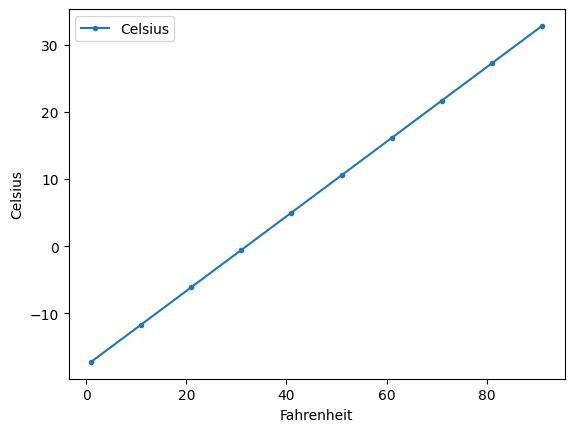

In [2]:
# Use DataFrame's plot() to plot temperatures
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

# Create a label for the y axis (x axis already exists)
y_label = axes.set_ylabel('Celsius')

### Section 1: Load

In [3]:
# Load data of average high January temperatures in NYC
avg_temps = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2: View

In [4]:
# View head and tail of data

#-> Head
avg_temps.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [5]:
#-> Tail
avg_temps.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3: Clean

In [6]:
# We know the month is always going to be January
# Therefore, we can get rid of the "01" at the end of each date value

#-> We can do that by floor-dividing each number by 100
avg_temps.Date = avg_temps.Date.floordiv(100)

#-> Check new values with head()
avg_temps.head(3)


,Date,Value,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [7]:
# Now we can change the "Date" column name to something more relavent like "Year"
# We also can change "Value" to "Temperature" since we are working with temperatures

#-> Use "columns" to change the column names
avg_temps.columns = ['Year', 'Temperature', 'Anamoly']

#-> Again, check changes using head()
avg_temps.head(3)

,Year,Temperature,Anamoly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4: Describe

In [8]:
# Change precision value to 2 decimal places
pd.set_option('display.precision', 2)

# Call describe() to see basic descriptive statistics about the high temperature
avg_temps.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5: Calculate Line

In [9]:
# Calculate formula of Linear Regression
lin_reg = stats.linregress(x = avg_temps.Year, y = avg_temps.Temperature)

# Show output variables
#-> Slope
lin_reg.slope

0.014771361132966163

In [10]:
#-> Y Intercept
lin_reg.intercept

8.694993233674289

### Section 6: Predict

In [11]:
# Use Linear Regression line to predict average NYC hibh temperature in January of 2026
(lin_reg.slope * 2026) + lin_reg.intercept

38.62177088906374

### Section 7: Plot

(10.0, 70.0)

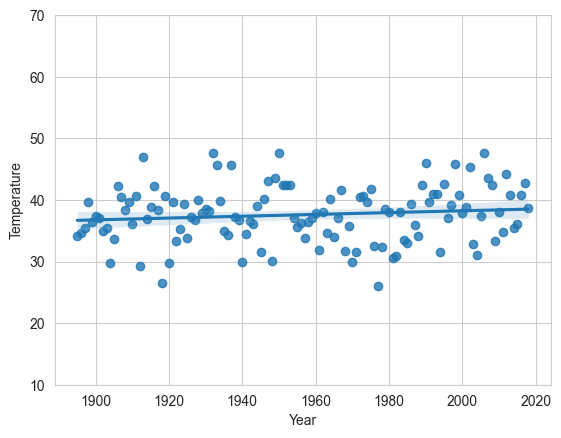

In [12]:
# Use Seaborn to create a scatterplot with a line of best fit

#-> Set style as "whitegrid"
sns.set_style('whitegrid')

#-> Use regplot() to plot the scatterplot
axes_sns = sns.regplot(x = avg_temps.Year, y = avg_temps.Temperature)

#-> Zoom out a bit to see more condensed data
axes_sns.set_ylim(10,70)

## Part 2: Machine Learning

Using the same data, create an machine learning object to help predict data for the future

### Section 1: Split

In [13]:
# Split data into 2 sections... 1 for training the machine and the other for testing
#-> Use train_test_split() from sklearn library
X_train, X_test, y_train, y_test = train_test_split(avg_temps.Year.values.reshape(-1,1), avg_temps.Temperature.values, random_state=11)

### Section 2: Train

In [14]:
# Use Linear Regression to "Train" the model
#-> Set the LinearRegression() estimator to a variable
lin_reg_train = LinearRegression()

#-> Now train that estimator using our test data
lin_reg_train.fit(X = X_train, y = y_train)

LinearRegression()

In [15]:
# We can now check slope and intercept of this Linear Regression model
#-> Slope
lin_reg_train.coef_

array([0.01939167])

In [16]:
#-> Intercept
lin_reg_train.intercept_

-0.30779820252656975

### Section 3: Test

In [17]:
# Test our model with the actual high temperatures
#-> Create an array of values the model will predict
prediction = lin_reg_train.predict(X_test)

#-> Create an array of the actual temperatures (it's just y_test)
actual_values = y_test

# Show comparison between predictions and expected values
for p, a in zip(prediction[::5], actual_values[::5]):
    print (f'Prediction: {p:.2f}, Actual Value: {a:.2f}') 

Prediction: 37.86, Actual Value: 31.70
Prediction: 38.69, Actual Value: 34.80
Prediction: 37.00, Actual Value: 39.40
Prediction: 37.25, Actual Value: 45.70
Prediction: 38.05, Actual Value: 32.30
Prediction: 37.64, Actual Value: 33.80
Prediction: 36.94, Actual Value: 39.70


### Section 4: Predict

In [18]:
# Use model to predict average high temperature in January of 2026
#-> Create a prediction expression
predict = (lambda x: (lin_reg_train.coef_ * x) + lin_reg_train.intercept_)

#-> Check if prediction works by inputing 2026
predict(2026)

array([38.97973189])

### Section 5: Scatterplot

(10.0, 70.0)

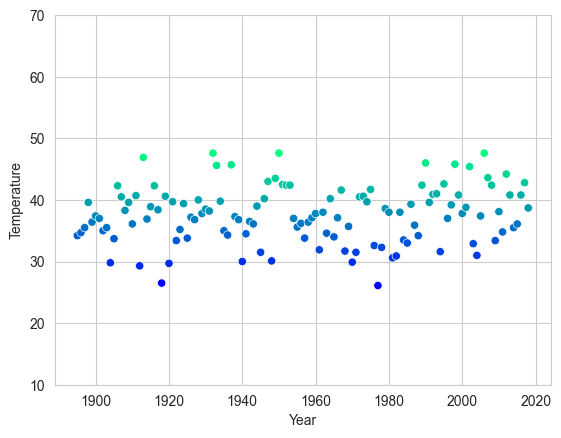

In [19]:
# Use Seaborn to graph a scatterplot of the data
#-> Create scatterplot
axes_sns_ML = sns.scatterplot(data = avg_temps, 
                              x = 'Year', 
                              y = 'Temperature',
                              hue = 'Temperature',
                              palette = 'winter',
                              legend = False)

#-> Zoom out a bit
axes_sns_ML.set_ylim(10,70)

### Section 6: Line

In [20]:
# Create a regression line to fit the data in the scatterplot
#-> Create a list of independent variables (years)
x = np.array([min(avg_temps.Year), max(avg_temps.Year)])

#-> Use the predict() model to find the y values (Temperatures)
y = predict(x)

(10.0, 70.0)

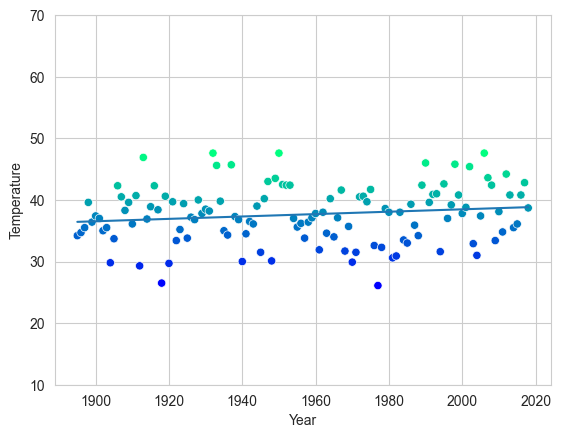

In [21]:
#-> Replot the scatterplot
axes_sns_ML = sns.scatterplot(data = avg_temps, 
                              x = 'Year', 
                              y = 'Temperature',
                              hue = 'Temperature',
                              palette = 'winter',
                              legend = False)

#-> Plot a regression line using x and y
reg_line = plt.plot(x,y)

#-> Zoom out a bit
axes_sns_ML.set_ylim(10,70)

## Part 3: Bonus
More practice using Machine Learning

Using California Housing Prices dataset

### Section 1: Load

In [22]:
# Import the data
from sklearn.datasets import fetch_california_housing

# Assign data to variable via fetch_california_housing() function
cal_house = fetch_california_housing()

### Section 2: Describe

In [23]:
# Display the description of the data using DESCR
print(cal_house.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [24]:
# Display the names of the features in the data using feature_names
cal_house.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### Section 3: DataFrame

In [25]:
# Import data to a pandas DataFrame
#-> Change some settings before passing in data
pd.set_option('display.max_columns', 9)         # We'll be addding a column to this dataframe
pd.set_option('display.width', None)            # Auto-detects display width when formatting string representations of DataFrames and Series


#-> Read data into DataFrame
cal_house_df = pd.DataFrame(cal_house.data, columns=cal_house.feature_names)


#-> Add column for median house value
cal_house_df['MedianHouseValue'] = pd.Series(cal_house.target)


#-> Can now check data with head() function
cal_house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.33,41.0,6.98,1.02,322.0,2.56,37.88,-122.23,4.53
1,8.30,21.0,6.24,0.97,2401.0,2.11,37.86,-122.22,3.58
2,7.26,52.0,8.29,1.07,496.0,2.80,37.85,-122.24,3.52
3,5.64,52.0,5.82,1.07,558.0,2.55,37.85,-122.25,3.41
4,3.85,52.0,6.28,1.08,565.0,2.18,37.85,-122.25,3.42


### Section 4: Describe ... Again

In [26]:
# Run describe() on DataFrame
cal_house_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


### Section 5: Visualize

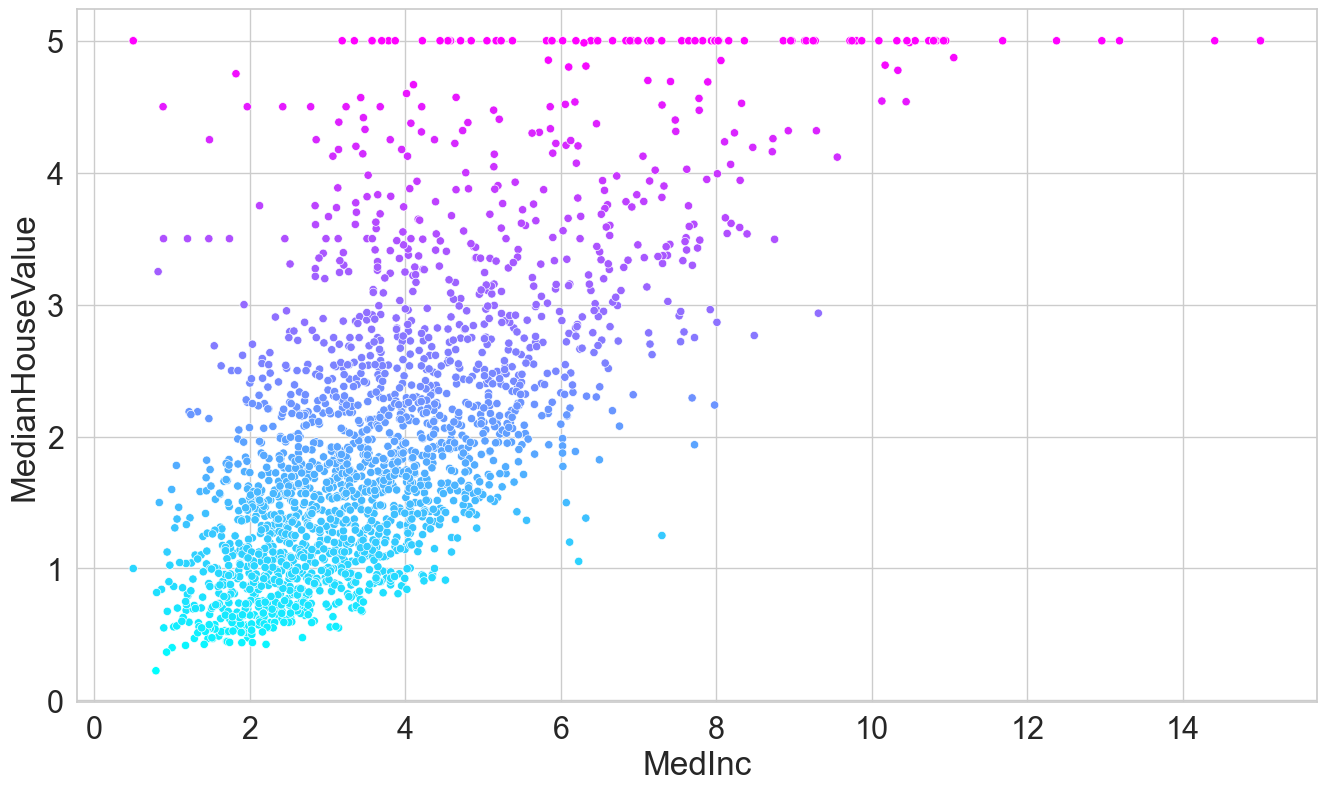

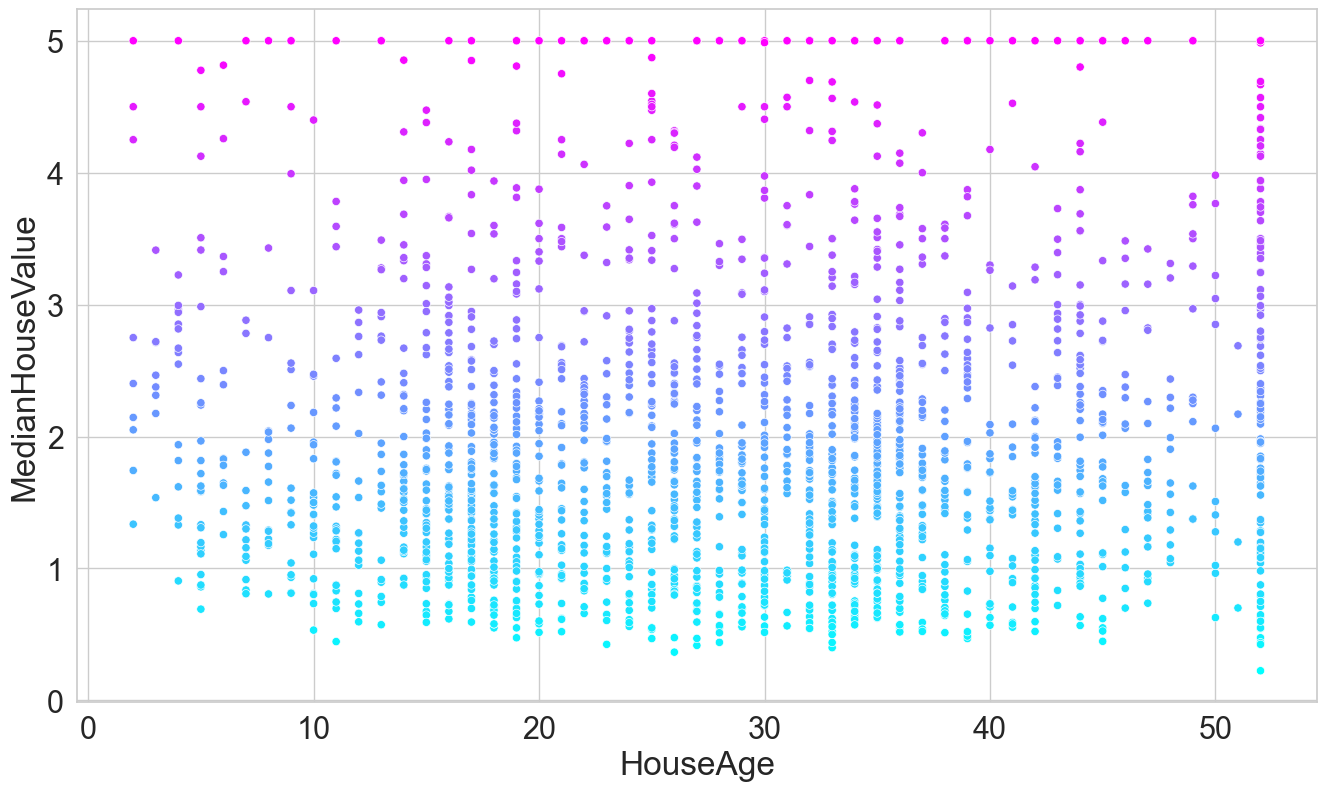

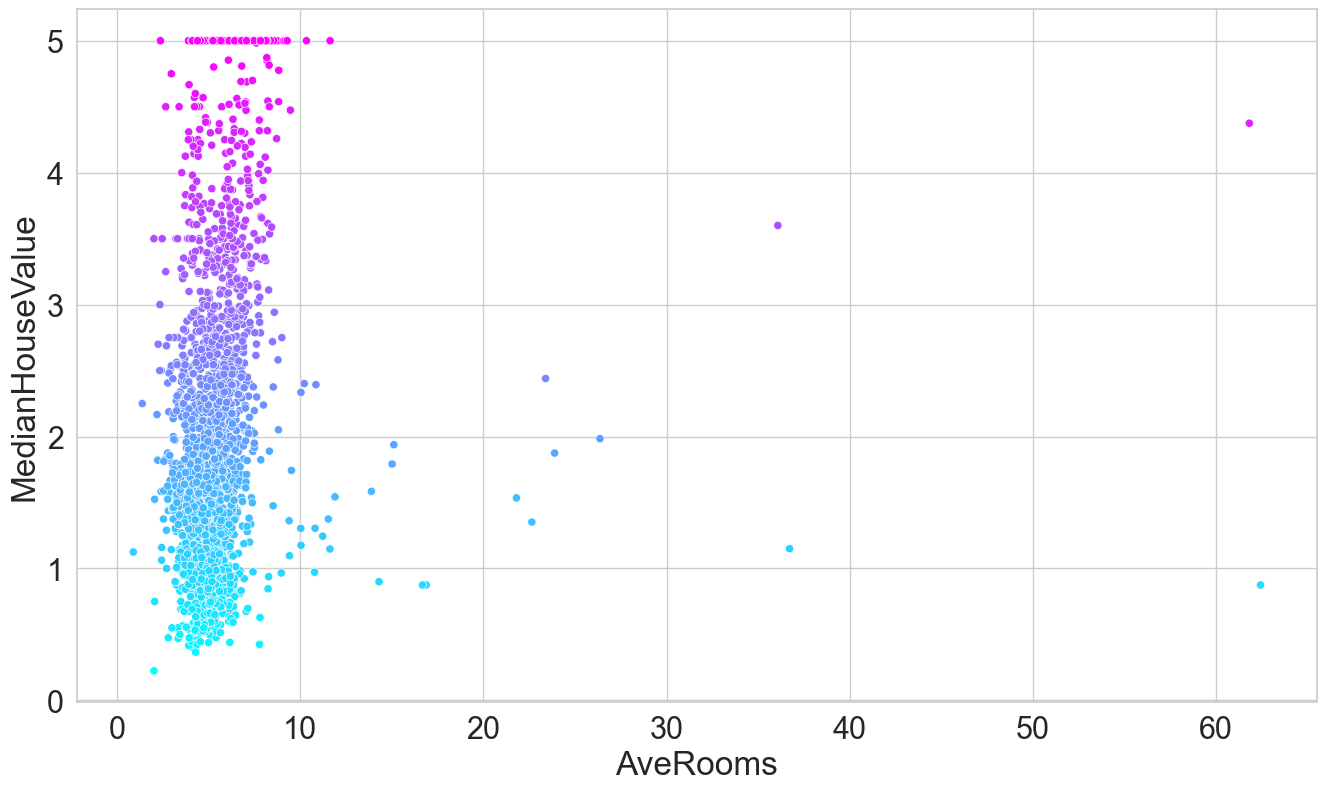

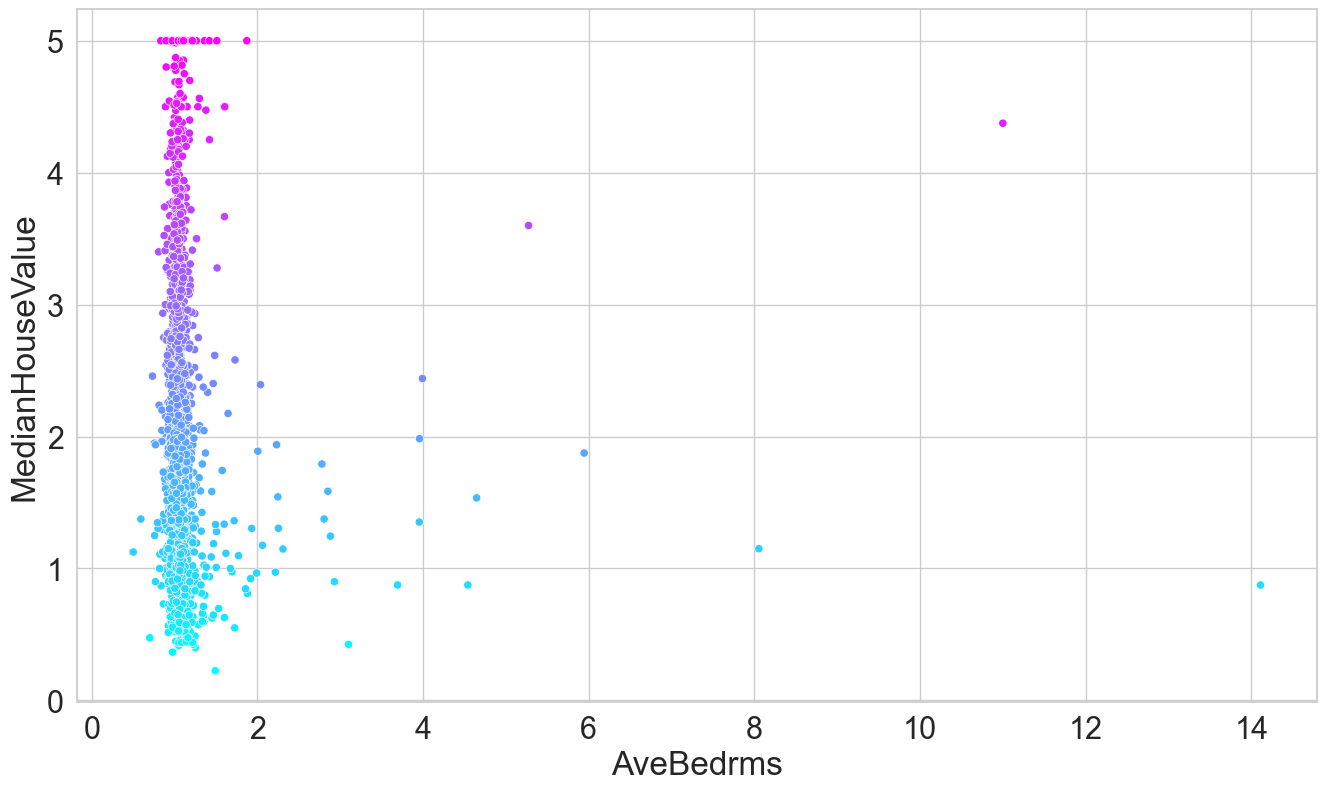

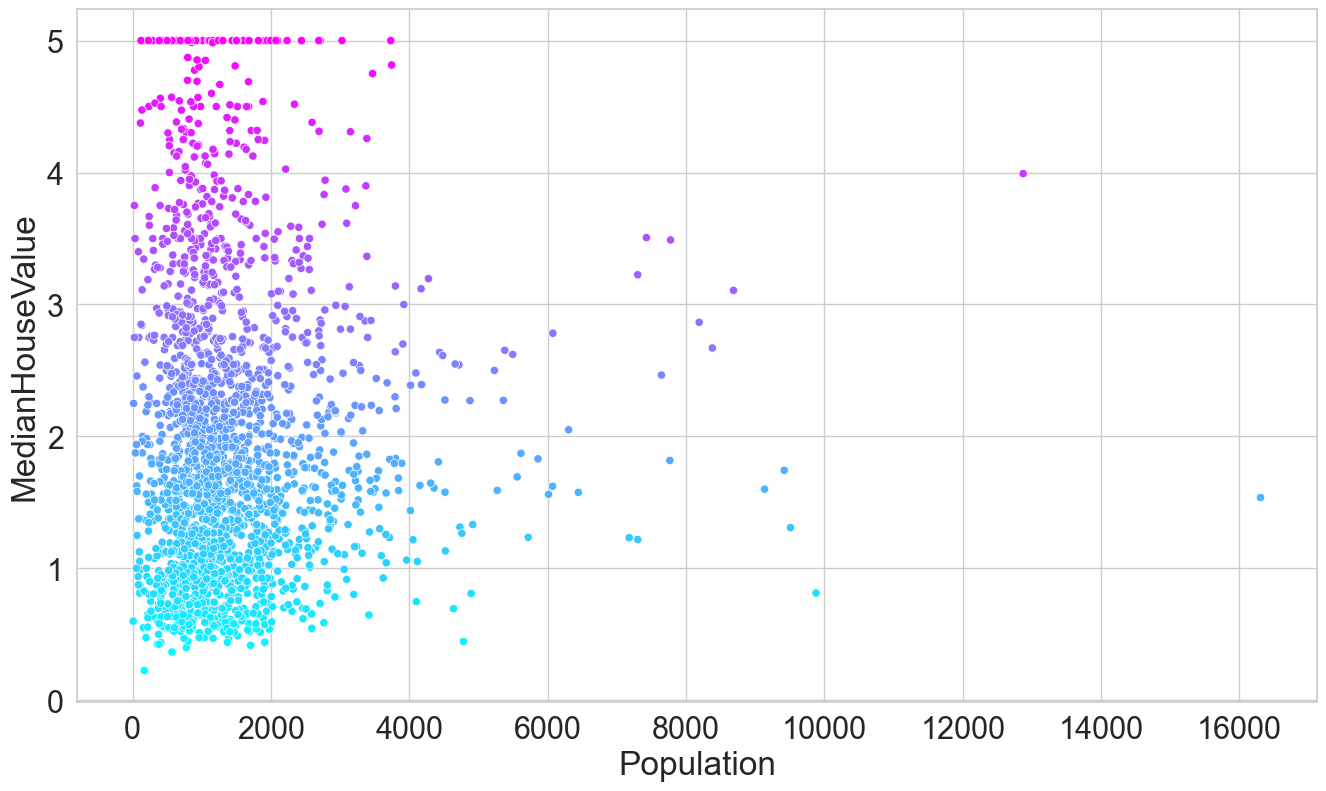

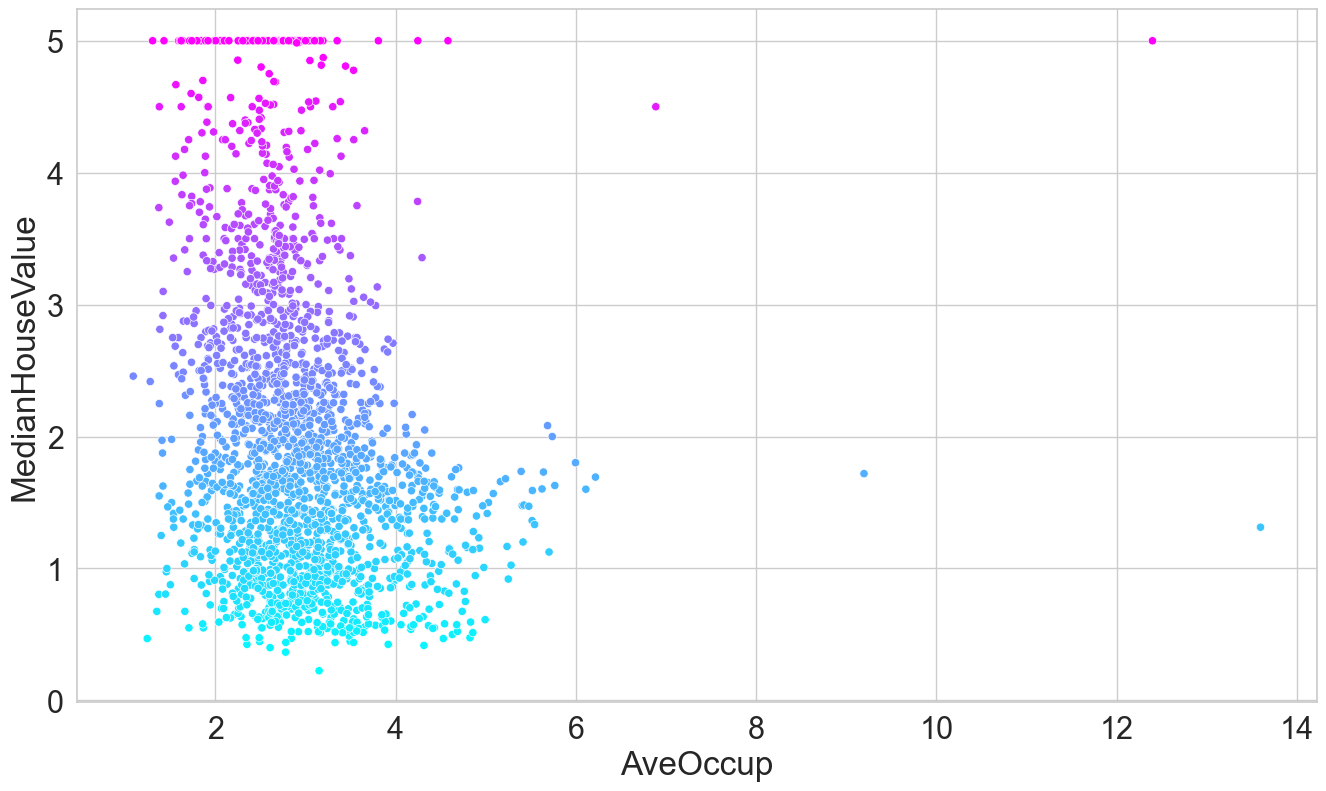

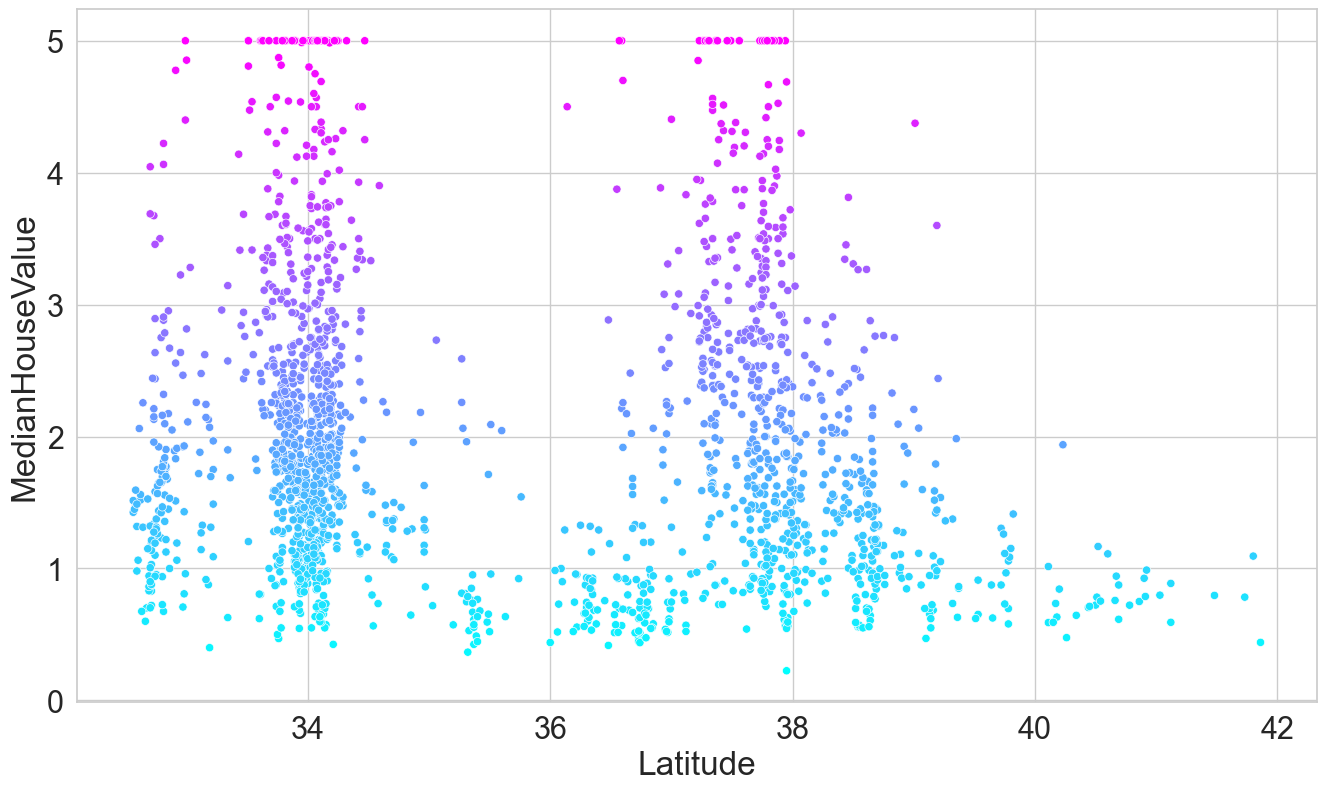

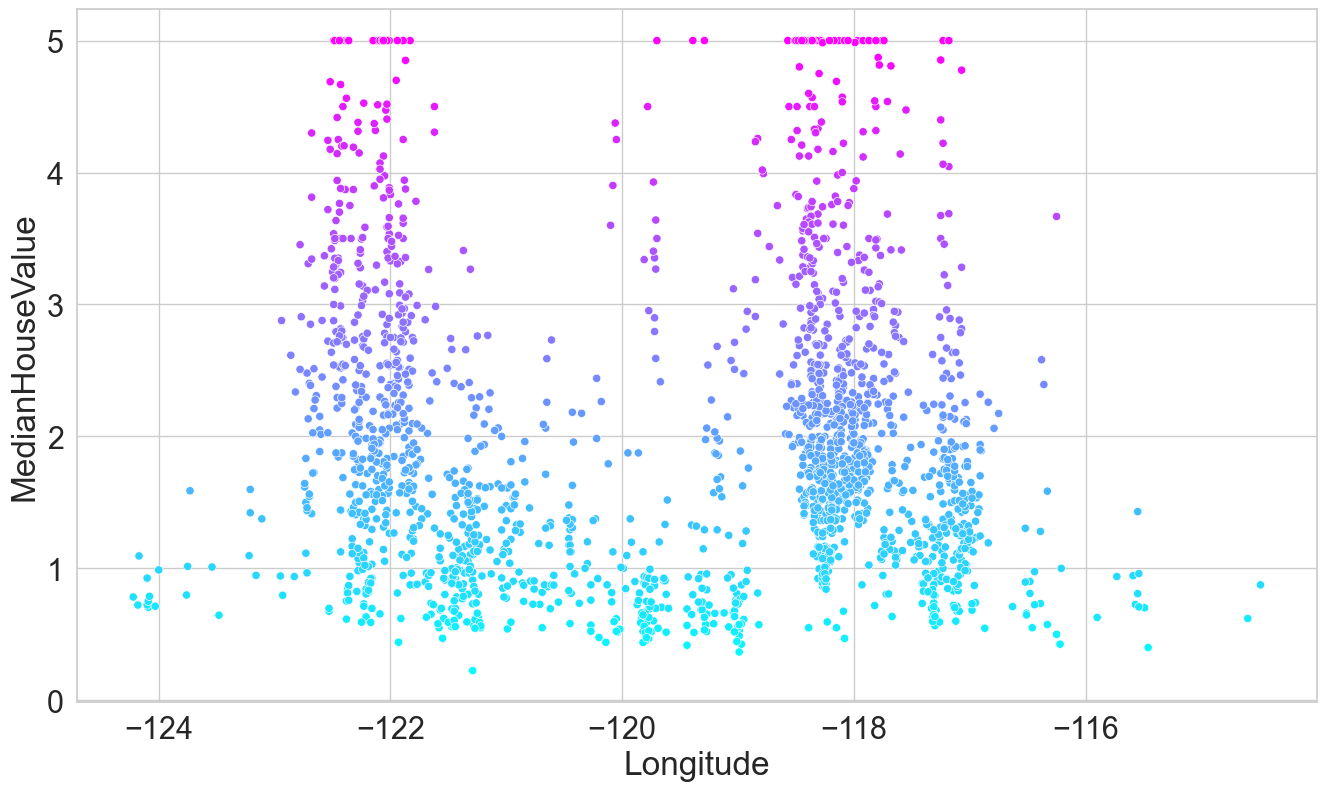

In [27]:
# Use Seaborn to plot a sample of the data
#-> Generate a sample (should be a tenth (0.1) of the whole dataset)
cal_house_sample = cal_house_df.sample(frac = 0.1, random_state = 17)


#-> Set graph preferences
sns.set(font_scale = 2)
sns.set_style('whitegrid')


#-> Plot the data
for feature in cal_house.feature_names:
    plt.figure(figsize = (16,9))
    sns.scatterplot(data = cal_house_sample,
                    x = feature,
                    y = 'MedianHouseValue',
                    hue = 'MedianHouseValue',
                    palette ='cool',
                    legend = False)

### Section 6: Split

In [28]:
# Split the data for ML Training and Testing
cal_X_train, cal_X_test, cal_y_train, cal_y_test = train_test_split(cal_house.data, cal_house.target, random_state=11)

# We can check how many inputs are now for training and testing
#-> Training
cal_X_train.shape

(15480, 8)

In [29]:
#-> Testing
cal_X_test.shape

(5160, 8)

### Section 7: Train

In [30]:
# Use Linear Regression to train this model
#-> Assign a variable to the LinearRegression() function
cal_lin_reg = LinearRegression()

#-> Create a line of best fit using the training variables
cal_lin_reg.fit(X = cal_X_train, y = cal_y_train)

LinearRegression()

In [31]:
#-> Output each coefficient as well as the intercept
#--> Coefficients
for i, name in enumerate(cal_house.feature_names):
    print(f'{name:>10}: {cal_lin_reg.coef_[i]}')

    MedInc: 0.43770302153822016
  HouseAge: 0.009216834565797695
  AveRooms: -0.1073252663736094
 AveBedrms: 0.6117133073918101
Population: -5.756822009296558e-06
  AveOccup: -0.0033845664657163226
  Latitude: -0.4194818609649083
 Longitude: -0.43377133498740217


In [32]:
#--> Intercept
print(f'Intercept: {cal_lin_reg.intercept_}')

Intercept: -36.8829506560555


### Section 8: Test

In [33]:
# Test the ML's predictions with the actual outputs of the remaining data
#-> Create prediction array
cal_predict = cal_lin_reg.predict(cal_X_test)

#-> Create expected value array
cal_expect = cal_y_test


#-> Compare the first five values
print('Predicted \t\t Expected\n-----------------------------------')
for i in range(5):
    print(f'{cal_predict[i]} \t {cal_expect[i]}')

Predicted 		 Expected
-----------------------------------
1.2539687612614543 	 0.762
2.3469310726473935 	 1.732
2.0379474488311473 	 1.125
1.8701253957507546 	 1.37
2.5360833933136817 	 1.856


### Section 9: Predicted vs. Expected
How did we do?

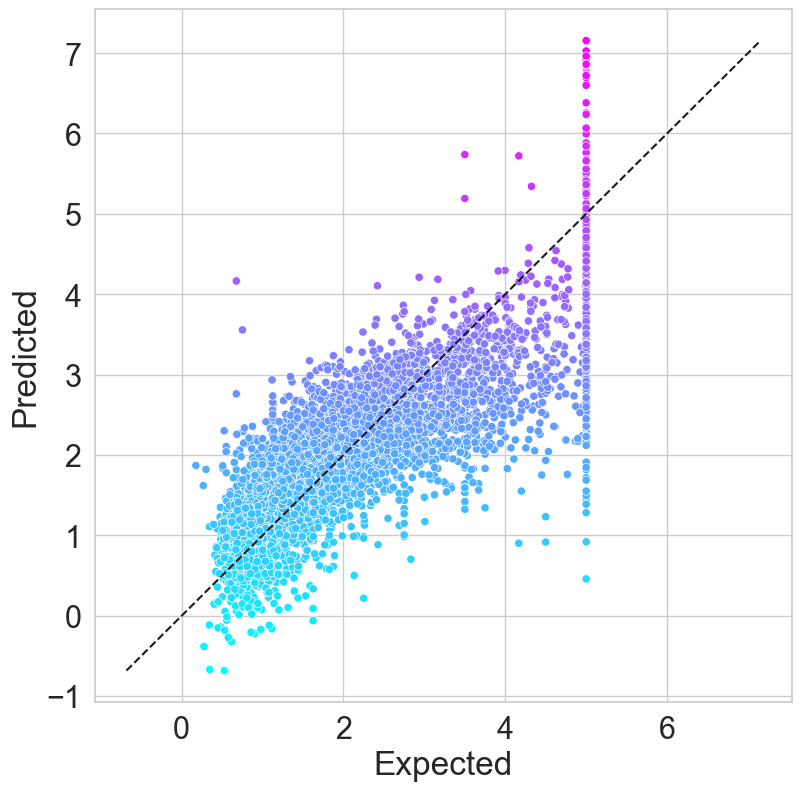

In [34]:
# Graph predicted values against the expected ones
#-> Create a DataFrame containing predicted and expected values
#--> Create an empty DataFrame
predict_expect_df = pd.DataFrame()

#--> Input predicted and expected values
predict_expect_df['Expected'] = pd.Series(cal_expect)
predict_expect_df['Predicted'] = pd.Series(cal_predict)


#-> Create scatterplot of predicted vs expected values
#--> Determine size of graph
figure = plt.figure(figsize=(9,9))

#--> Plot actual graph
cal_axes = sns.scatterplot(data = predict_expect_df,
                           x = 'Expected',
                           y = 'Predicted',
                           hue = 'Predicted',
                           palette = 'cool',
                           legend = False)

#--> Set x and y axes to match min / max values of Expected and Predicted
start = min(cal_expect.min(), cal_predict.min())
end = max(cal_expect.max(), cal_predict.max())

#--> Add in a line of best fit
predict_expect_line = plt.plot([start, end], [start, end], 'k--')

### Section 10: Metrics

In [35]:
# Figure out some Regression Model metrics
#-> Import the metrics module
from sklearn import metrics

#-> Calculate R^2
metrics.r2_score(cal_expect, cal_predict)

0.6008983115964331

In [36]:
#-> Calculate MSE (Mean Squared Error)
metrics.mean_squared_error(cal_expect, cal_predict)

0.535014977444912

### Section 11: Best Model

In [37]:
# Figure out which model works best for given data
#-> Import ElasticNet, Lasso, and Ridge -> These are the other models we will be testing
from sklearn.linear_model import ElasticNet, Lasso, Ridge

#-> Create an 'estimators' variable
estimators = {
    'LinearRegression()': cal_lin_reg,
    'ElasticNet()': ElasticNet(),
    'Lasso()': Lasso(),
    'Ridge()': Ridge()
}

In [41]:
#-> Import KFold and cross_val_score to run the estimators through
from sklearn.model_selection import KFold, cross_val_score

#-> Run the actual test
print('Estimator \t\t Mean of R^2 Scores \n---------------------------------------------')
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, 
                  random_state=11, 
                  shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
                             X = cal_house.data,
                             y = cal_house.target,
                             cv = kfold,
                             scoring = 'r2')
    print(f'{estimator_name:>18}: \t {scores.mean(): .6f}')

Estimator 		 Mean of R^2 Scores 
---------------------------------------------
LinearRegression(): 	  0.599413
      ElasticNet(): 	  0.422504
           Lasso(): 	  0.284513
           Ridge(): 	  0.599419


R^2 indicates the accurace a model has when making predictions.  So the higher this value, the more accurate the model is.

Therefore, Ridge is barely (just barely) the best model to use for this data.

## Part 4: Final Remarks

- Although the Machine Learning training session didn't yield perfect test results, we now have an automated method of ataining someting really close

&emsp;&emsp;&emsp; This will lead to much more efficient predicting in the future since we now can let a machine to the "heavy lifting"

- Both methods showed a predicted max average temperature just short of 39 degrees in January 2026

- As shown in this notebook, there is more than one way to achieve a goal / outcome / graph / etc.

- Even though Part 2 is better off in the long run, I found I enjoyed working through Part 1 a bit more.

&emsp;&emsp;&emsp; Maybe it's because I was more fresh when doing Part 1.

- The bonus part took MUCH longer than expected.  However, it was well worth doing as I felt I was strengthening my understanding of Machine Learning